In [50]:
#Standard imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Split data for training and testing
from sklearn.model_selection import train_test_split

#Models
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier

#Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# Tree plotting
import pydot
from IPython.display import Image
import graphviz 
#from sklearn.externals.six import StringIO  
from io import StringIO

%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
#Read in data set
df = pd.read_csv('new_data_small.csv', index_col=0)

<bound method NDFrame.head of        DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP      DEP_BLOCK  SEGMENT_NUMBER  \
MONTH                                                                          
1                1          0               1        MORNING               1   
1                1          0               3  EARLY_MORNING               1   
1                1          0               2        MORNING               1   
1                1          0               1  EARLY_MORNING               1   
1                1          0               3        MORNING               1   
...            ...        ...             ...            ...             ...   
1                2          0               1        EVENING               9   
1                2          0               1        EVENING              10   
1                2          0               1        EVENING              11   
1                2          0               1     LATE_NIGHT              13   
1         

array([[<AxesSubplot:title={'center':'PRCP'}>]], dtype=object)

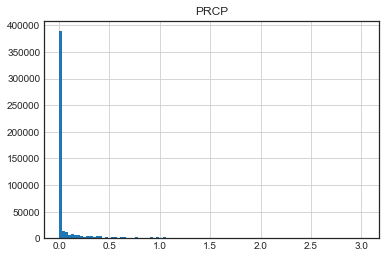

In [6]:
#Histogram for frequency of precipitation
df.hist(column='PRCP', bins=100)

array([[<AxesSubplot:title={'center':'SNOW'}>]], dtype=object)

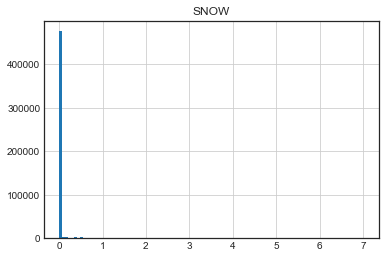

In [7]:
df.hist(column='SNOW', bins=100)

array([[<AxesSubplot:title={'center':'AWND'}>]], dtype=object)

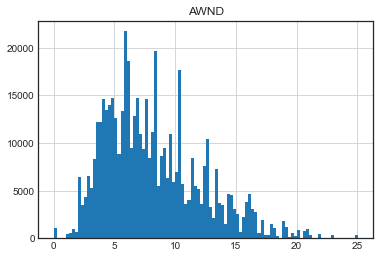

In [8]:
df.hist(column='AWND', bins=100)

array([[<AxesSubplot:title={'center':'TMAX'}>]], dtype=object)

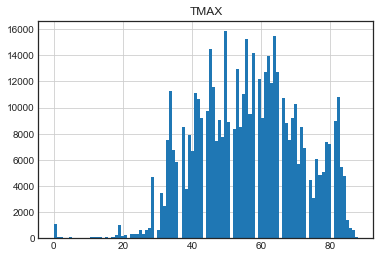

In [9]:
df.hist(column='TMAX', bins=100)

<AxesSubplot:xlabel='DISTANCE_GROUP'>

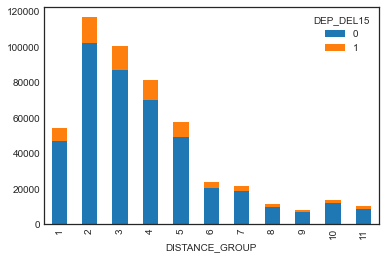

In [10]:
pd.crosstab(df['DISTANCE_GROUP'],df['DEP_DEL15']).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='DEP_BLOCK'>

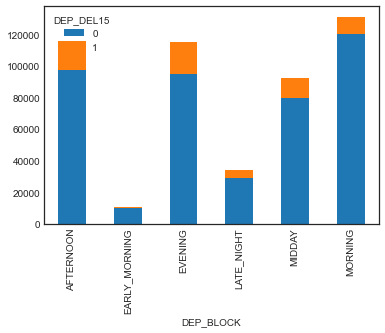

In [11]:
pd.crosstab(df['DEP_BLOCK'],df['DEP_DEL15']).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='SNOW'>

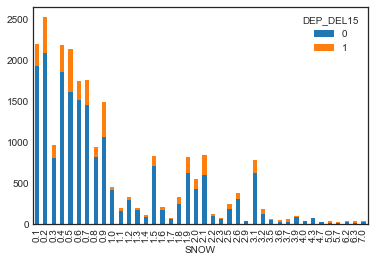

In [12]:
df1 = df[df.SNOW>0]
pd.crosstab(df1['SNOW'],df1['DEP_DEL15']).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='SNWD'>

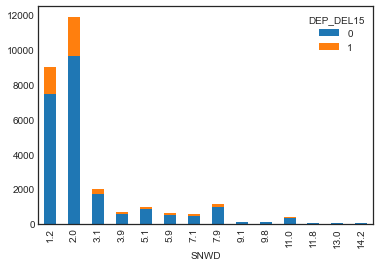

In [13]:
df1 = df[df.SNWD>0]
pd.crosstab(df1['SNWD'],df1['DEP_DEL15']).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='PRCP'>

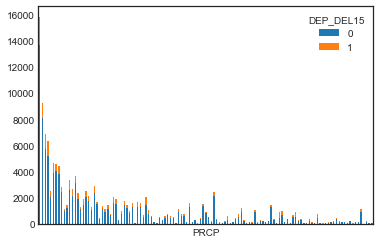

In [14]:
df1 = df[df.PRCP>0]
pd.crosstab(df1['PRCP'],df1['DEP_DEL15']).plot(kind="bar",stacked=True, xticks=[])

<AxesSubplot:xlabel='TMAX'>

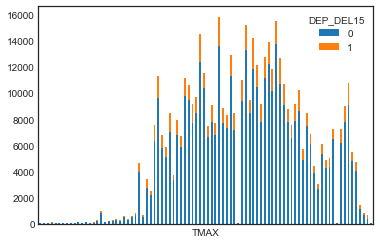

In [15]:
df1 = df[df.TMAX>0]
pd.crosstab(df1['TMAX'],df1['DEP_DEL15']).plot(kind="bar",stacked=True,xticks=[])

<AxesSubplot:xlabel='AWND'>

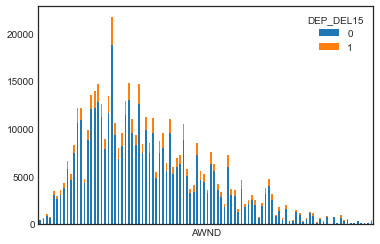

In [16]:
df1 = df[df.AWND>0]
pd.crosstab(df1['AWND'],df1['DEP_DEL15']).plot(kind="bar",stacked=True,xticks=[])

<AxesSubplot:xlabel='SEGMENT_NUMBER'>

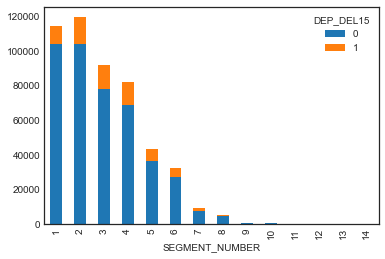

In [17]:
pd.crosstab(df['SEGMENT_NUMBER'],df['DEP_DEL15']).plot(kind="bar",stacked=True)

In [4]:
#Read in edited data set
df1 = pd.read_csv('new_data_small edit.csv', index_col=None)

<bound method NDFrame.head of         DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  CONCURRENT_FLIGHTS  \
0               0               1               1                  49   
1               0               3               1                   8   
2               0               2               1                  49   
3               0               1               1                   8   
4               0               3               1                  49   
...           ...             ...             ...                 ...   
498932          0               1               9                  11   
498933          0               1              10                  11   
498934          0               1              11                  11   
498935          0               1              13                  11   
498936          0               1              13                  11   

        NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
0                   

In [5]:
#Split data for training and test
x=df1.drop(['DEP_DEL15'], axis=1)
y=df1[['DEP_DEL15']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.33)

In [6]:
# Confusion matrix, from class

def plot_cm(labels, predictions, p=0.5):
    
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])
    print('Total Positive (Actual): ', np.sum(cm[1]))

In [7]:
# ROC, from class
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'violet', 'orange', 'purple']
    
def plot_roc(name, labels, predictions, **kwargs):
    
    #plt.figure(figsize = (6, 6))
    plt.style.use('ggplot')
    
    fp, tp, _ = roc_curve(labels, predictions)

    lbl = name + " AUC: "+str(round(roc_auc_score(1-labels, 1-predictions.ravel()),3))
    plt.plot(100*fp, 100*tp, label=lbl, linewidth=2, **kwargs)
    plt.plot(100*fp, 100*fp,'r--');
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    #plt.xlim([-0.5,20])
    #plt.ylim([80,100.5])
    #plt.grid(True)
    
    #plt.plot(fpr, tpr, label = "ROC score: "+str(round(roc_auc_score(1-y_test, 1-pred_vals[:,1]),3)), color = "violet", lw = 3);

    ax = plt.gca()
    ax.set_aspect('equal')

In [24]:
#Basic Logistic Regression
clf = skl_lm.LogisticRegression(solver='saga')
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


accuracy: 0.864

Confusion table:
 True            0      1
Predicted               
0          142309  22341
1               0      0

               precision    recall  f1-score   support

           0       0.86      1.00      0.93    142309
           1       0.00      0.00      0.00     22341

    accuracy                           0.86    164650
   macro avg       0.43      0.50      0.46    164650
weighted avg       0.75      0.86      0.80    164650


 

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC-score:  0.5
True Negatives:  142309
False Positives:  0
False Negatives:  22341
True Positives:  0
Total Positive (Actual):  22341


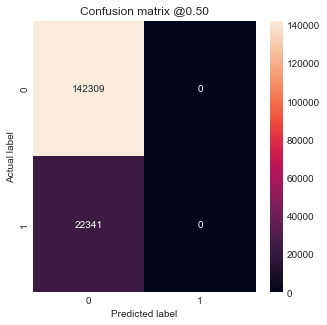

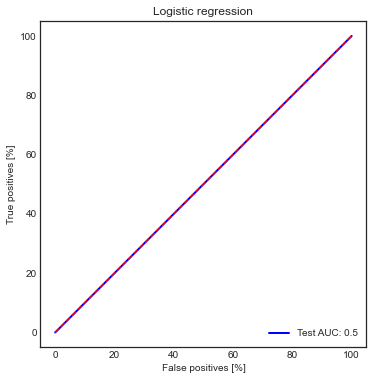

In [25]:
#Format for all model metrics
#Accuracy percent
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
#Confusion Matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

#Area under curve
plt.title('Logistic regression')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [26]:
#LOGIT with balanced classes
clf = skl_lm.LogisticRegression(solver='saga',class_weight='balanced')
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


accuracy: 0.517

Confusion table:
 True           0      1
Predicted              
0          73238  10403
1          69071  11938

               precision    recall  f1-score   support

           0       0.88      0.51      0.65    142309
           1       0.15      0.53      0.23     22341

    accuracy                           0.52    164650
   macro avg       0.51      0.52      0.44    164650
weighted avg       0.78      0.52      0.59    164650


 ROC-score:  0.5244972773970905
True Negatives:  73238
False Positives:  69071
False Negatives:  10403
True Positives:  11938
Total Positive (Actual):  22341


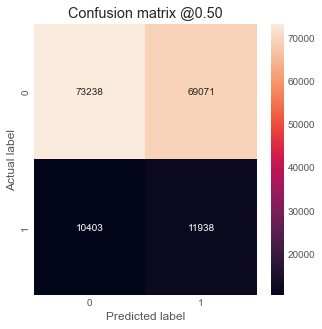

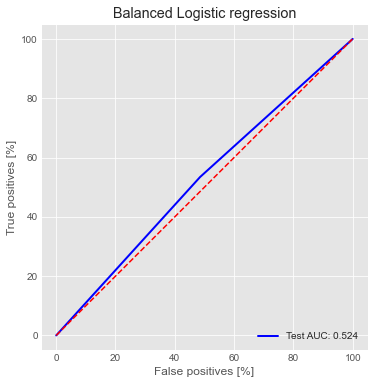

In [27]:
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('Balanced Logistic regression')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [52]:
#Ridge Regression
clf = RidgeClassifier(alpha=1.0, solver='saga')
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1223: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.863

Confusion table:
 True            0      1
Predicted               
0          142170  22480
1               0      0

               precision    recall  f1-score   support

           0       0.86      1.00      0.93    142170
           1       0.00      0.00      0.00     22480

    accuracy                           0.86    164650
   macro avg       0.43      0.50      0.46    164650
weighted avg       0.75      0.86      0.80    164650



C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 ROC-score:  0.5
True Negatives:  142170
False Positives:  0
False Negatives:  22480
True Positives:  0
Total Positive (Actual):  22480


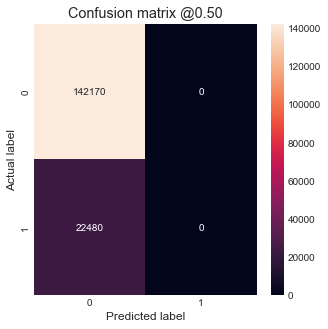

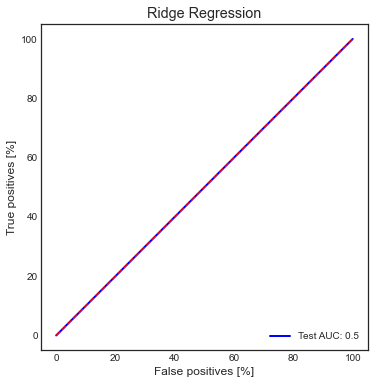

In [53]:
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('Ridge Regression')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [28]:
#LDA
lda = LinearDiscriminantAnalysis()
pred = lda.fit(x_train, y_train).predict(x_test)

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.864

Confusion table:
 True            0      1
Predicted               
0          142191  22302
1             118     39

               precision    recall  f1-score   support

           0       0.86      1.00      0.93    142309
           1       0.25      0.00      0.00     22341

    accuracy                           0.86    164650
   macro avg       0.56      0.50      0.47    164650
weighted avg       0.78      0.86      0.80    164650


 ROC-score:  0.5004582439136948
True Negatives:  142191
False Positives:  118
False Negatives:  22302
True Positives:  39
Total Positive (Actual):  22341


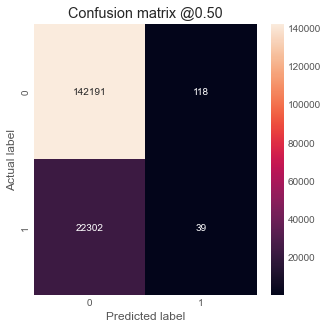

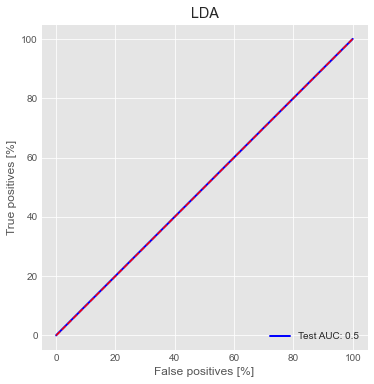

In [30]:
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=lda.classes_,columns=lda.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('LDA')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [31]:
#QDA
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(x_train, y_train).predict(x_test)

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.837

Confusion table:
 True            0      1
Predicted               
0          135889  20347
1            6420   1994

               precision    recall  f1-score   support

           0       0.87      0.95      0.91    142309
           1       0.24      0.09      0.13     22341

    accuracy                           0.84    164650
   macro avg       0.55      0.52      0.52    164650
weighted avg       0.78      0.84      0.80    164650


 ROC-score:  0.5220699220294241
True Negatives:  135889
False Positives:  6420
False Negatives:  20347
True Positives:  1994
Total Positive (Actual):  22341


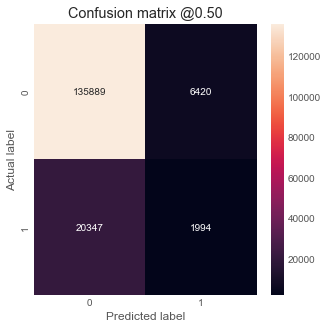

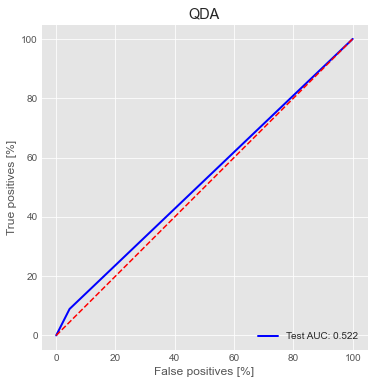

In [33]:
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=qda.classes_,columns=qda.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('QDA')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [16]:
#KNN, k=1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(x_train, y_train).predict(x_test)

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy: 0.795

Confusion table:
 True            0      1
Predicted               
0          125908  17411
1           16262   5069

               precision    recall  f1-score   support

           0       0.88      0.89      0.88    142170
           1       0.24      0.23      0.23     22480

    accuracy                           0.80    164650
   macro avg       0.56      0.56      0.56    164650
weighted avg       0.79      0.80      0.79    164650


 ROC-score:  0.5555525679497029
True Negatives:  125908
False Positives:  16262
False Negatives:  17411
True Positives:  5069
Total Positive (Actual):  22480


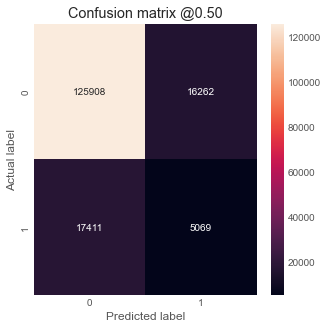

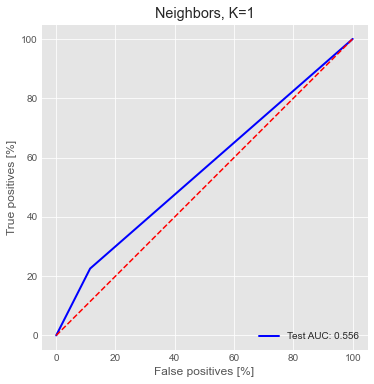

In [18]:
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=knn.classes_,columns=knn.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('Neighbors, K=1')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [19]:
#KNN, k=5
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
pred = knn.fit(x_train, y_train).predict(x_test)

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy: 0.853

Confusion table:
 True            0      1
Predicted               
0          138059  20142
1            4111   2338

               precision    recall  f1-score   support

           0       0.87      0.97      0.92    142170
           1       0.36      0.10      0.16     22480

    accuracy                           0.85    164650
   macro avg       0.62      0.54      0.54    164650
weighted avg       0.80      0.85      0.82    164650


 ROC-score:  0.5375437361716976
True Negatives:  138059
False Positives:  4111
False Negatives:  20142
True Positives:  2338
Total Positive (Actual):  22480


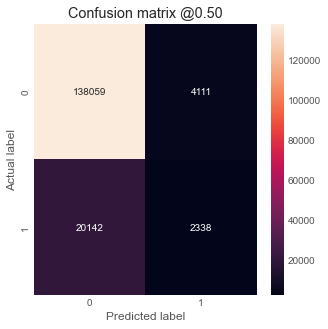

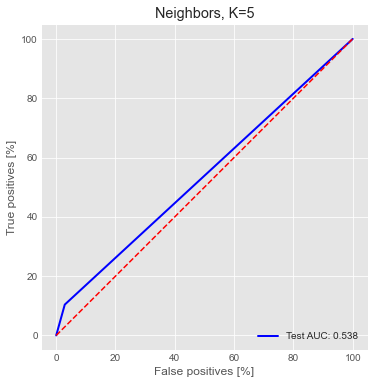

In [20]:
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=knn.classes_,columns=knn.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('Neighbors, K=5')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [14]:
#KNN, k=100
knn = neighbors.KNeighborsClassifier(n_neighbors=100)
pred = knn.fit(x_train, y_train).predict(x_test)

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


accuracy: 0.863

Confusion table:
 True            0      1
Predicted               
0          142170  22476
1               0      4

               precision    recall  f1-score   support

           0       0.86      1.00      0.93    142170
           1       1.00      0.00      0.00     22480

    accuracy                           0.86    164650
   macro avg       0.93      0.50      0.46    164650
weighted avg       0.88      0.86      0.80    164650


 ROC-score:  0.5000889679715302
True Negatives:  142170
False Positives:  0
False Negatives:  22476
True Positives:  4
Total Positive (Actual):  22480


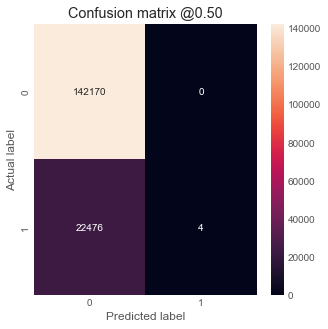

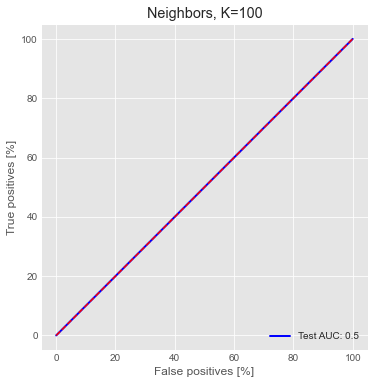

In [15]:
print("accuracy: %0.3f" % accuracy_score(y_test, pred))
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=knn.classes_,columns=knn.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('Neighbors, K=100')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [45]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=10, random_state=0)
tree.fit(x_train, y_train)
pred=tree.predict(x_test)

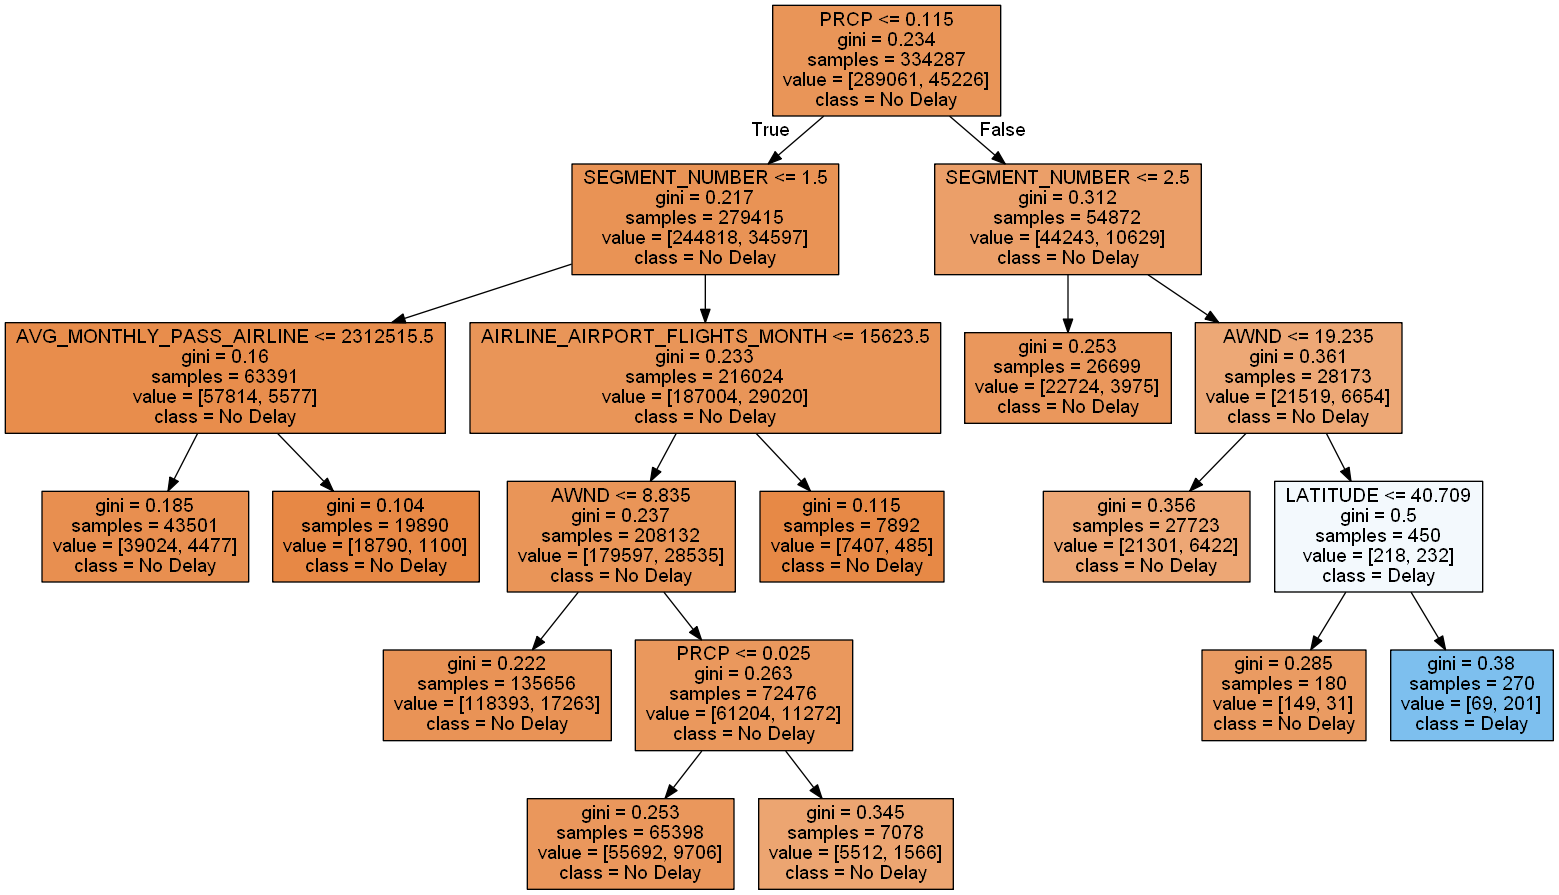

In [46]:
#=== Use print_tree function from class
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return (graph)

#Print visualization of tree
graph, = print_tree(tree, features=x_train.columns, class_names= ['No Delay', 'Delay'])
Image(graph.create_png())

accuracy: 0.864

Confusion table:
 True           No    Yes
Predicted               
No         142126  22379
Yes            44    101

               precision    recall  f1-score   support

           0       0.86      1.00      0.93    142170
           1       0.70      0.00      0.01     22480

    accuracy                           0.86    164650
   macro avg       0.78      0.50      0.47    164650
weighted avg       0.84      0.86      0.80    164650


 ROC-score:  0.5020916969609588
True Negatives:  142126
False Positives:  44
False Negatives:  22379
True Positives:  101
Total Positive (Actual):  22480


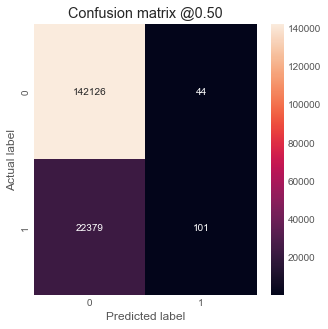

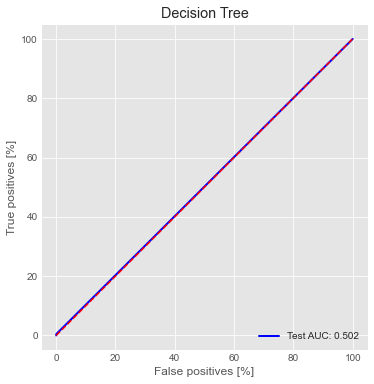

In [44]:
print("accuracy: %0.3f" % clf.score(x_test,y_test))
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print('\nConfusion table:\n', cm)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('Decision Tree')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [34]:
#Tree with bagging
treeBag = BaggingClassifier(random_state=1)
treeBag.fit(x_train, y_train)
pred=treeBag.predict(x_test)

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.847

Confusion table:
 True           No    Yes
Predicted               
No         136470  19314
Yes          5839   3027

               precision    recall  f1-score   support

           0       0.88      0.96      0.92    142309
           1       0.34      0.14      0.19     22341

    accuracy                           0.85    164650
   macro avg       0.61      0.55      0.55    164650
weighted avg       0.80      0.85      0.82    164650


 ROC-score:  0.5472301839453538
True Negatives:  136470
False Positives:  5839
False Negatives:  19314
True Positives:  3027
Total Positive (Actual):  22341


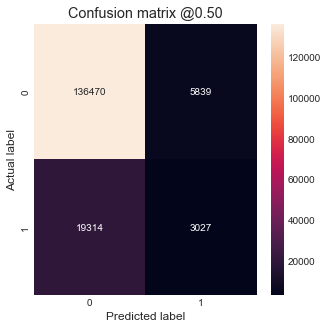

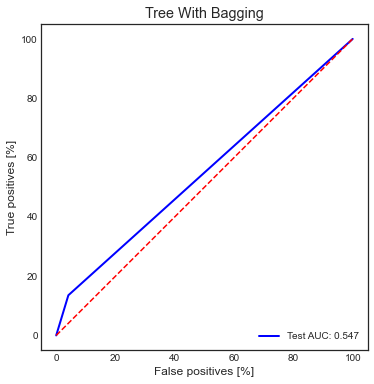

In [50]:
print("accuracy: %0.3f" % treeBag.score(x_test,y_test))
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print('\nConfusion table:\n', cm)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('Tree With Bagging')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [60]:
#Random Forest
treeForest = RandomForestClassifier(max_features=6, random_state=1)
treeForest.fit(x_train, y_train)

pred=treeForest.predict(x_test)

C:\Users\Sammy\AppData\Local\Temp/ipykernel_43176/303730079.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  treeForest.fit(x_train, y_train)


accuracy: 0.853

Confusion table:
 True           No    Yes
Predicted               
No         137414  19361
Yes          4820   3055

               precision    recall  f1-score   support

           0       0.88      0.97      0.92    142234
           1       0.39      0.14      0.20     22416

    accuracy                           0.85    164650
   macro avg       0.63      0.55      0.56    164650
weighted avg       0.81      0.85      0.82    164650


 ROC-score:  0.5511993811742725
True Negatives:  137414
False Positives:  4820
False Negatives:  19361
True Positives:  3055
Total Positive (Actual):  22416


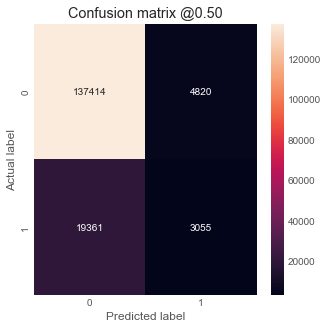

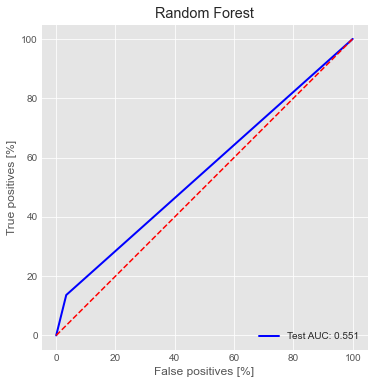

In [61]:
print("accuracy: %0.3f" % treeForest.score(x_test,y_test))
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print('\nConfusion table:\n', cm)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('Random Forest')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [10]:
#Tree with boosting
treeBoost = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=1, max_depth=3)
treeBoost.fit(x_train,y_train)

pred=treeBoost.predict(x_test)

C:\Users\Sammy\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.863

Confusion table:
 True           No    Yes
Predicted               
No         142162  22470
Yes             8     10

               precision    recall  f1-score   support

           0       0.86      1.00      0.93    142170
           1       0.56      0.00      0.00     22480

    accuracy                           0.86    164650
   macro avg       0.71      0.50      0.46    164650
weighted avg       0.82      0.86      0.80    164650


 ROC-score:  0.5001942845978838
True Negatives:  142162
False Positives:  8
False Negatives:  22470
True Positives:  10
Total Positive (Actual):  22480


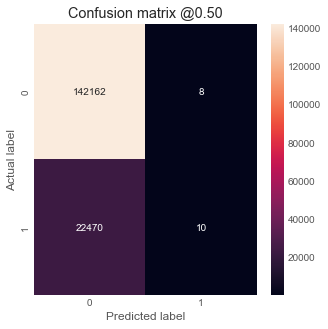

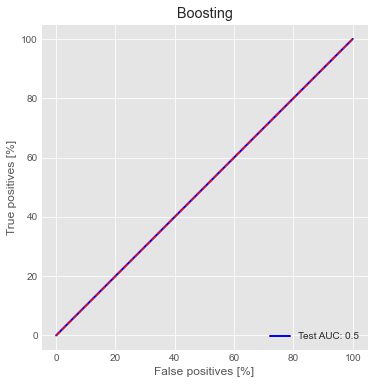

In [13]:
print("accuracy: %0.3f" % treeBoost.score(x_test,y_test))
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print('\nConfusion table:\n', cm)
print('\n',classification_report(y_test, pred))
print('\n', 'ROC-score: ', roc_auc_score(y_test,pred))
plot_cm(y_test, pred)
plt.figure(figsize = (6, 6))

plt.title('Boosting')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')